We generally start our code by importing the libraries which we will throughtout the programme

In [1]:
import numpy as np
import pandas as pd
import sklearn


Now we will load the data that we will be using our train model
Here we are using boston house pricing dataset which is availabele in the sklearn library itself.

In [4]:
from sklearn.datasets import load_boston
df=load_boston()

In [ ]:
df

In [10]:
type(df)

sklearn.utils.Bunch

In [ ]:
df.keys()

In [ ]:
print(df.feature_names)

In [ ]:
print(df.filename)

In [ ]:
print(df.target)

In [ ]:
print(df.DESCR)

In [ ]:
print(df.data)

we convert our dataset into the pandas dataframe,so that is easier to analyse the data

In [ ]:
boston=pd.DataFrame(df.data, columns=df.feature_names)
boston.head(20)

Add a new column of target values of the dataframe

In [ ]:
boston['MEDV']=df.target
boston.head()

Check if the dataset contains any null value or not

In [ ]:
boston.isnull()

isnull return True or False for each of the cell in the dataframe,but we cant go exploring the cells to look for True values if any,so we use sum() function to count all the cells with True value(i.e Null Cells) 

In [ ]:
boston.isnull().sum()

We never  Train the model on all the data that we have,we always make sure to atleast have a test datset,which is different from the training dataset.

In [47]:
from sklearn.model_selection import train_test_split
X=boston.drop('MEDV', axis=1)
Y=boston['MEDV']
X_train,X_test,Y_train,Y_test=train_test_split(X ,Y , test_size=0.15, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(430, 13)
(76, 13)
(430,)
(76,)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## SPLITING THE DATASET INTO THE TRAIN AND TEST SET TO MAKE SURE THE 

##X=boston.drop('MEDV', axis=1)

##X_train,X_test,Y_train,Y_test=train_test_split(X ,Y , test_size=0.15, random_state=5)


In [49]:
## FITTING MODEL ON THE TRAINING DATASET 
lin_model=LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
##y=boston.drop('MEDV', axis=1)
y_train_predict=lin_model.predict(X_train)
rmse=(np.sqrt(mean_squared_error(Y_train,y_train_predict)))

print("the model performance for training set")
print('RMSE is{} '.format(rmse))
print("\n")

##on testing set
y_test_predict=lin_model.predict(X_test)
rmse=(np.sqrt(mean_squared_error(Y_test,y_test_predict)))

print("the model performance for training set")
print('RMSE is{} '.format(rmse))

the model performance for training set
RMSE is4.710901797319796 


the model performance for training set
RMSE is4.687543527902972 


Text(0, 0.5, 'predicted')

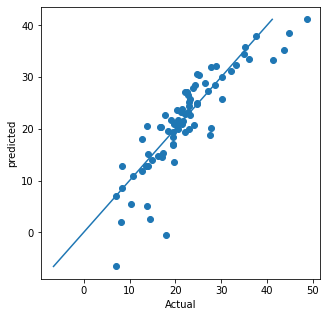

In [54]:
#MATPLOTLIB IS A LIBRARY TO PLOT THE CURVES 
#PART OF DATA VISUALIZATION

import matplotlib.pyplot as plt 

plt.figure(figsize=(5,5))
plt.scatter(Y_test,y_test_predict)
plt.plot([min(y_test_predict),max(y_test_predict)], [min(y_test_predict), max(y_test_predict)])
plt.xlabel('Actual')
plt.ylabel('predicted')
